In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.font_manager.fontManager.addfont('/opt/localdata/Data/bea/nlp/bmi550/assignment2/Tinos-Regular.ttf')
mpl.rc('font', family='Tinos')

prov_log_df = pd.read_csv("/opt/localdata/Data/bea/nlp/bmi550/project/Chronic_Pain_Sentiment_NLP/models/provider_sentiment/sample_size_analysis.csv")
gen_log_df = pd.read_csv("/opt/localdata/Data/bea/nlp/bmi550/project/Chronic_Pain_Sentiment_NLP/models/general_sentiment/sample_size_analysis.csv")

In [2]:
col_list = sns.color_palette("husl", as_cmap=False)
col_list

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

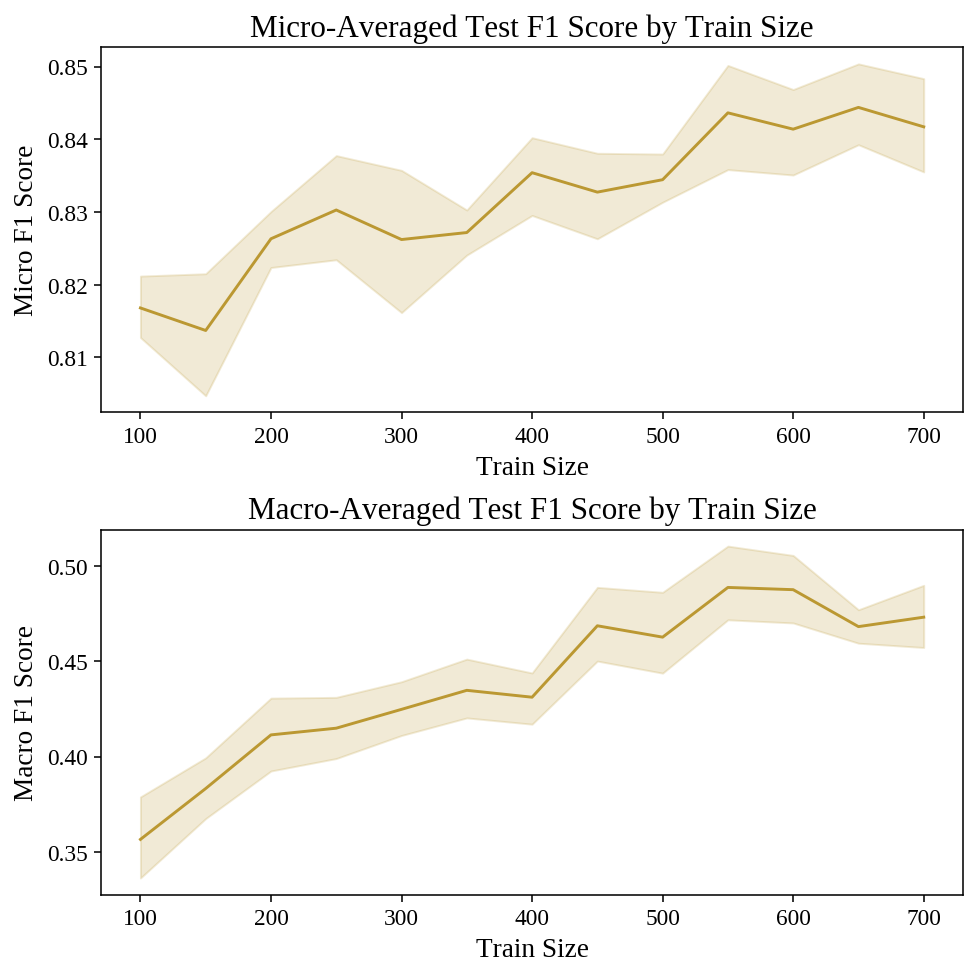

In [3]:
# # Assuming log_df is your pandas DataFrame
# # log_df = pd.read_csv('your_file.csv')  # Uncomment and modify if you're loading from a file

# fig, ax_list = plt.subplots(2, 1, dpi=140, figsize=(7, 7))

# for ax, df in zip(ax_list, [gen_log_df, prov_log_df])
# # Using Seaborn's lineplot to plot the means and confidence intervals
# sns.lineplot(
#     x='train_size', 
#     y='test_micro_f1', 
#     data=log_df, 
#     ax=ax1,
#     color=col_list[1], 
#     err_kws={
#         "fc": col_list[1], 
#         "edgecolor": col_list[1]
#     }
# )
# ax1.set_title('Micro-Averaged Test F1 Score by Train Size', fontsize=16)
# ax1.set_xlabel('Train Size', fontsize=14)
# ax1.set_ylabel('Micro F1 Score', fontsize=14)
# ax1.tick_params(axis='both', which='major', labelsize=12)

# sns.lineplot(
#     x='train_size', 
#     y='test_macro_f1', 
#     data=log_df, 
#     ax=ax2, 
#     color=col_list[1], 
#     err_kws={
#         "fc": col_list[1], 
#         "edgecolor": col_list[1]
#     }
# )

# ax2.set_title('Macro-Averaged Test F1 Score by Train Size', fontsize=16)
# ax2.set_xlabel('Train Size', fontsize=14)
# ax2.set_ylabel('Macro F1 Score', fontsize=14)
# ax2.tick_params(axis='both', which='major', labelsize=12)

# fig.tight_layout(pad=0.8)
# plt.show()

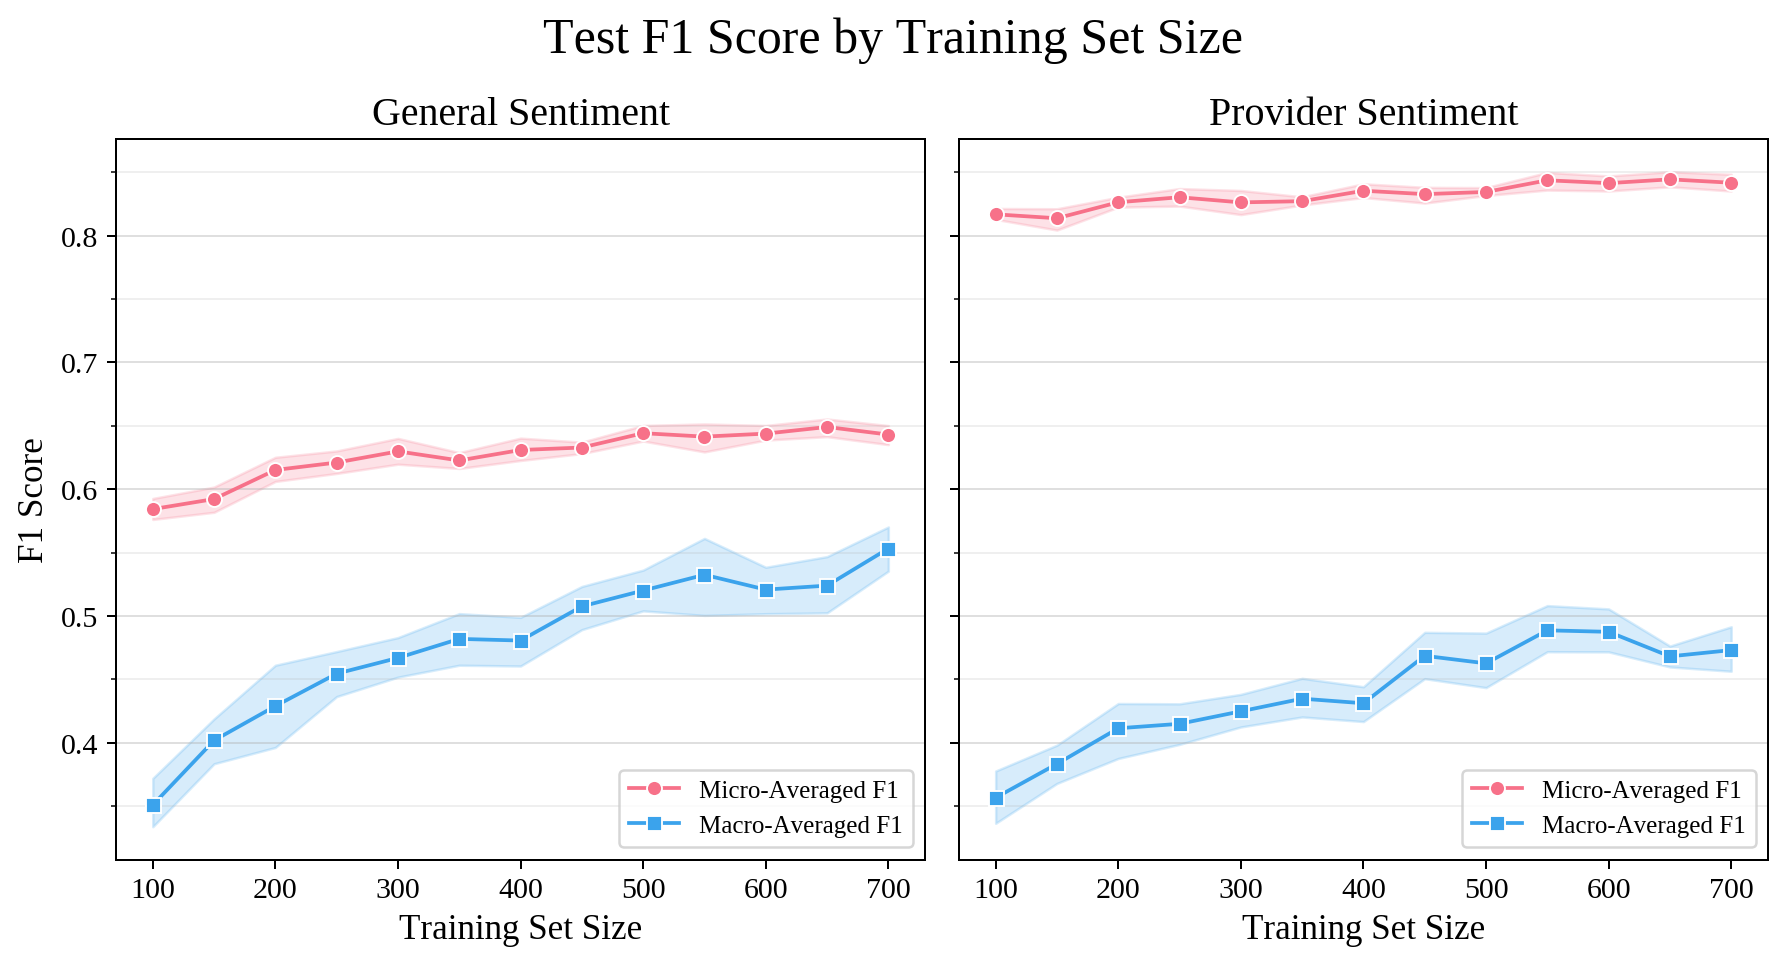

In [42]:
# Assuming log_df is your pandas DataFrame
# log_df = pd.read_csv('your_file.csv')  # Uncomment and modify if you're loading from a file

fig, ax_list = plt.subplots(1, 2, dpi=180, sharey=True, figsize=(10, 5))

for ax, log_df, sent_type in zip(ax_list, [gen_log_df, prov_log_df], ['General', 'Provider']):
    var_list = ['test_micro_f1', 'test_macro_f1']#, 'test_auc']
    var_name_list = ['Micro-Averaged F1', 'Macro-Averaged F1']#, 'Macro-Avg. AUC']
    sel_col_list = [col_list[0], col_list[4]]
    sel_marker_list = ['o', 's']

    for sel_var, sel_var_name, sel_col, sel_marker in zip(var_list, var_name_list, sel_col_list, sel_marker_list):
        sns.lineplot(
            x='train_size', 
            y=sel_var,
            label=sel_var_name,
            data=log_df, 
            ax=ax, 
            color=sel_col,
            marker=sel_marker,
            err_kws={
                "fc": sel_col, 
                "edgecolor": sel_col
            }
        )

    ax.set_title(f'{sent_type} Sentiment', fontsize=16)
    ax.set_xlabel('Training Set Size', fontsize=14)
    ax.set_ylabel('F1 Score', fontsize=14)
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='x', which='minor', bottom=False)
    


    ax.legend(loc='lower right')
    ax.grid(axis = "y", which='major', alpha=0.4)
    ax.grid(axis = "y", which='minor', alpha=0.2)
    # ax.minorticks_on()
    
fig.tight_layout(pad=1)
fig.suptitle("Test F1 Score by Training Set Size", fontsize=20, y=1.06)
plt.show()